pointers

-> overall increasing trend from 2014 to 2025

-> initial weak increasing trend from 2015 to 2019, then a dip in before increasing again from end 2020 to 2025

-> evidence of seasonality

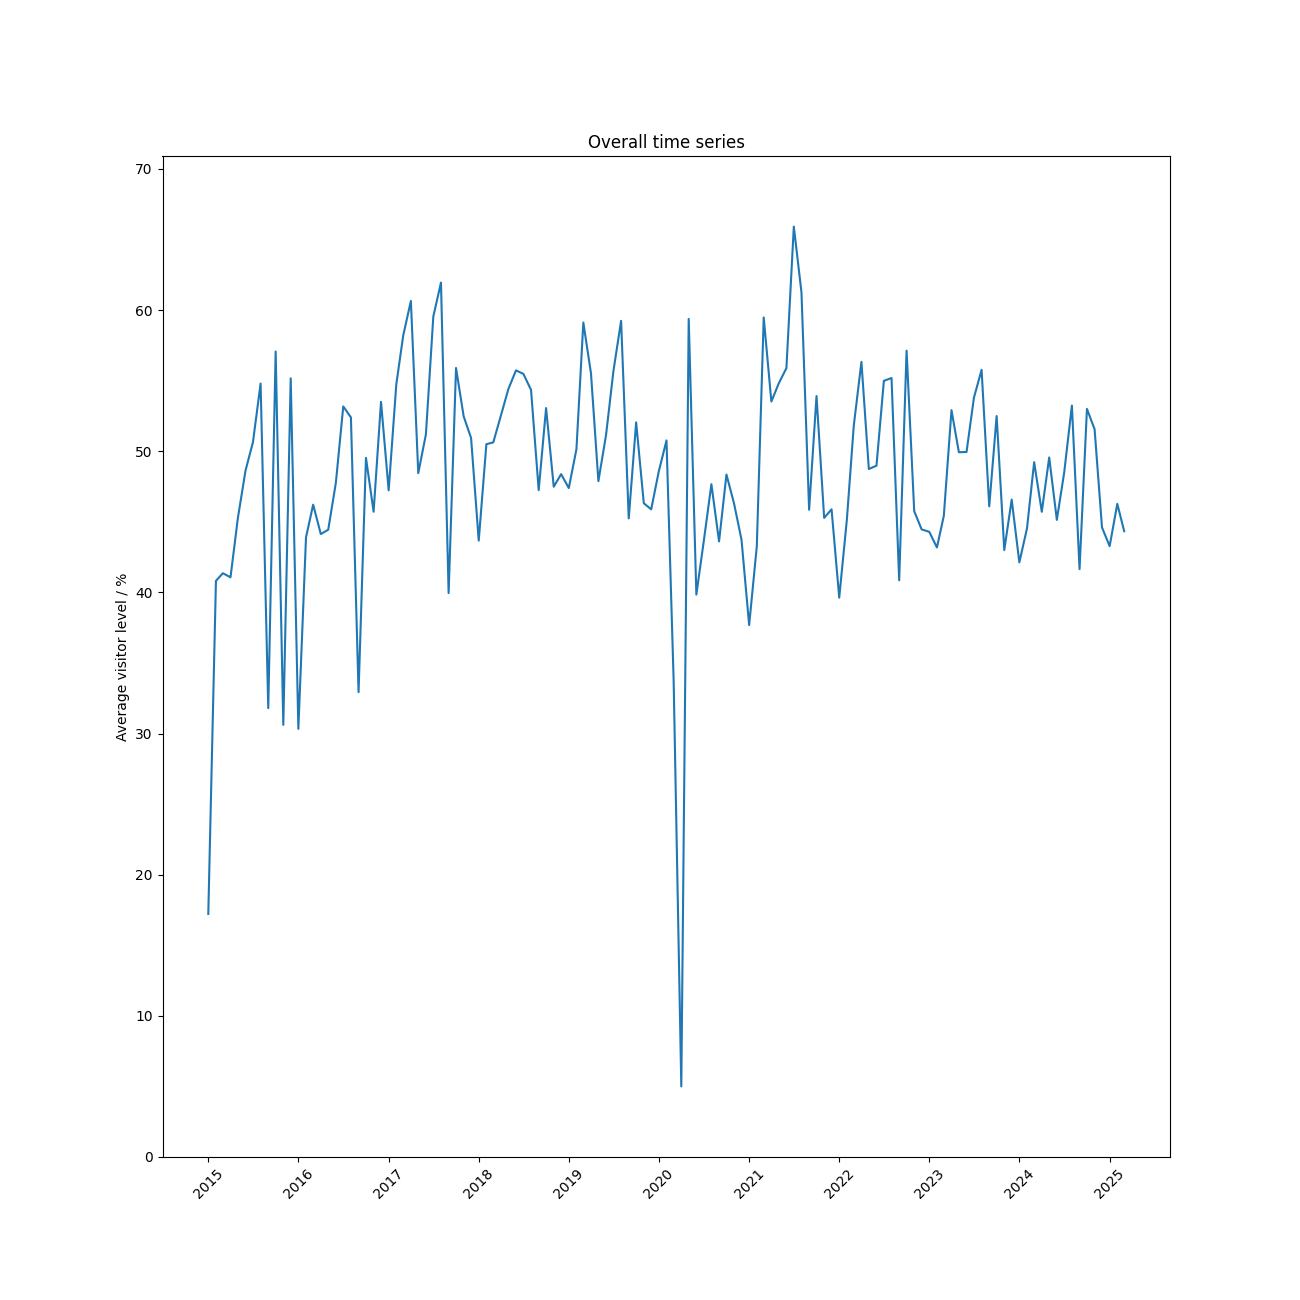

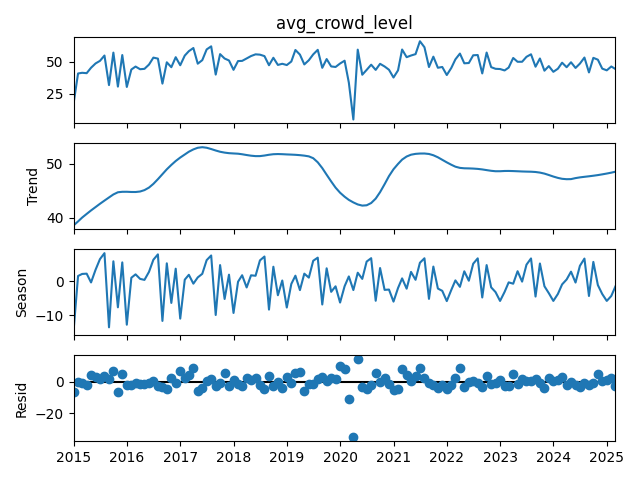

In [59]:
from s03_analysis_time_series import peak_month,trough_month
from IPython.display import Image, display

display(Image(filename='../other/overall_trend_time_series.png'), \
Image(filename='../other/overall_STL_decomposition.png'))


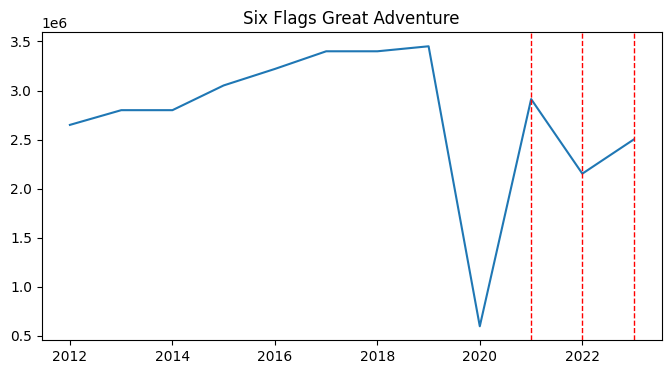

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# avg_crowd_data = pd.read_csv('../data/raw/avg_crowd.csv', na_values='NA')
# avg_crowd_data = avg_crowd_data.loc[avg_crowd_data['name'] == 'Disneyland Park Paris', :]

# avg_crowd_data['month'] = avg_crowd_data['month'].apply(lambda mon: list(calendar.month_abbr).index(mon))
# avg_crowd_data['date'] = pd.to_datetime(avg_crowd_data[['year', 'month']].assign(day=1))
# avg_crowd_data = avg_crowd_data.loc[avg_crowd_data['date'] <= pd.Timestamp('today'), ]
# avg_crowd_data = avg_crowd_data.sort_values('date')

# fig, ax = plt.subplots(figsize = (13, 13))
# ax.plot(avg_crowd_data['date'], avg_crowd_data['avg_crowd_level'])  


total_attendee_data =  pd.read_csv('../data/raw/attendee.csv')
total_attendee_data['date'] = pd.to_datetime(total_attendee_data[['year']].assign(day=1, month=1))

def get_plots(total_attendee_data, park_name, years=[]):
    data = total_attendee_data.loc[total_attendee_data['name'].str.contains(park_name)]
    data = data.sort_values('date')
    #print(data)
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(data['date'], data['attendee_count'])
    ax.set_title(f'{data.get('name').unique()[0]}')  
    
    year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    for timestamp in year_lst:
        plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    plt.show()

# # disney_paris_data = total_attendee_data.loc[total_attendee_data['name'] == 'Disneyland Park Paris']
# # epcot_data = total_attendee_data.loc[total_attendee_data['name'].str.contains('Epcot')]

# epcot_data = epcot_data.sort_values('date')
# print(epcot_data.shape)

# 2021 - 2023 campaign "The World’s Most Magical Celebration"
# get_plots(total_attendee_data, 'Epcot', list(range(2020,2024)))

# # 2018 campaign "Magic Everywhere"
# get_plots(total_attendee_data, 'Disneyland Park Paris', [2017,2018,2019])

# # 2023 campaign "Ignite the Magic"
# get_plots(total_attendee_data, 'Shanghai Disney Resort', list(range(2021,2024)))

get_plots(total_attendee_data, 'Six Flags Great Adventure', list(range(2021,2024)))
# fig, ax = plt.subplots(figsize = (13, 13))
# ax.plot(epcot_data['date'], epcot_data['attendee_count'])  

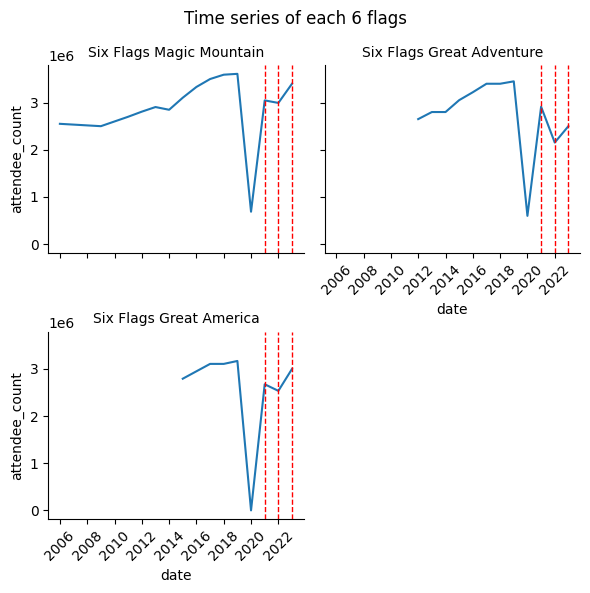

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

total_attendee_data =  pd.read_csv('../data/raw/attendee.csv')
total_attendee_data['date'] = pd.to_datetime(total_attendee_data[['year']].assign(day=1, month=1))

def get_plots(total_attendee_data, park_name, years=[]):
    data = total_attendee_data.loc[total_attendee_data['name'].str.contains(park_name)]
    data = data[data['name'].isin(['Six Flags Magic Mountain', 'Six Flags Great Adventure','Six Flags Great America'])]
    data = data.sort_values('date')
    
    
    g = sns.FacetGrid(data, col='name', col_wrap = 2)
    g = g.map(plt.plot, 'date', 'attendee_count')
    year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    
    for ax in g.axes.flat:
        plt.sca(ax)
        plt.xticks(rotation = 45)
        for timestamp in year_lst:
            plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    g = g.set_titles('{col_name}')
    g = g.fig.suptitle('Time series of each 6 flags')
    
    plt.tight_layout()
    plt.show()
    # fig, ax = plt.subplots(figsize = (8, 4))
    # ax.plot(data['date'], data['attendee_count'])
    # ax.set_title)
    # ax.set_xticks(rotation=45)
    
    # year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    # for timestamp in year_lst:
    #     plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    

# # disney_paris_data = total_attendee_data.loc[total_attendee_data['name'] == 'Disneyland Park Paris']
# # epcot_data = total_attendee_data.loc[total_attendee_data['name'].str.contains('Epcot')]

# epcot_data = epcot_data.sort_values('date')
# print(epcot_data.shape)

# 2021 - 2023 campaign "The World’s Most Magical Celebration"
# get_plots(total_attendee_data, 'Epcot', list(range(2020,2024)))

# # 2018 campaign "Magic Everywhere"
# get_plots(total_attendee_data, 'Disneyland Park Paris', [2017,2018,2019])

# # 2023 campaign "Ignite the Magic"
# get_plots(total_attendee_data, 'Shanghai Disney Resort', list(range(2021,2024)))

get_plots(total_attendee_data, 'Six Flags', list(range(2021,2024)))

# fig, ax = plt.subplots(figsize = (13, 13))
# ax.plot(epcot_data['date'], epcot_data['attendee_count'])  

After the campaign year, total attendance drop

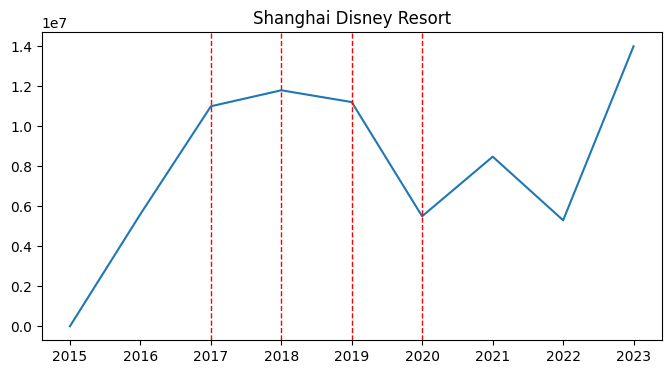

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

total_attendee_data =  pd.read_csv('../data/raw/attendee.csv')
total_attendee_data['date'] = pd.to_datetime(total_attendee_data[['year']].assign(day=1, month=1))

def get_plots(total_attendee_data, park_name, years=[]):
    data = total_attendee_data.loc[total_attendee_data['name'].str.contains(park_name)]
    data = data.sort_values('date')

    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(data['date'], data['attendee_count'])
    ax.set_title(f'{data.get('name').unique()[0]}')  
    
    year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    for timestamp in year_lst:
        plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    plt.show()
    
get_plots(total_attendee_data, 'Shanghai Disney', list(range(2017,2021)))

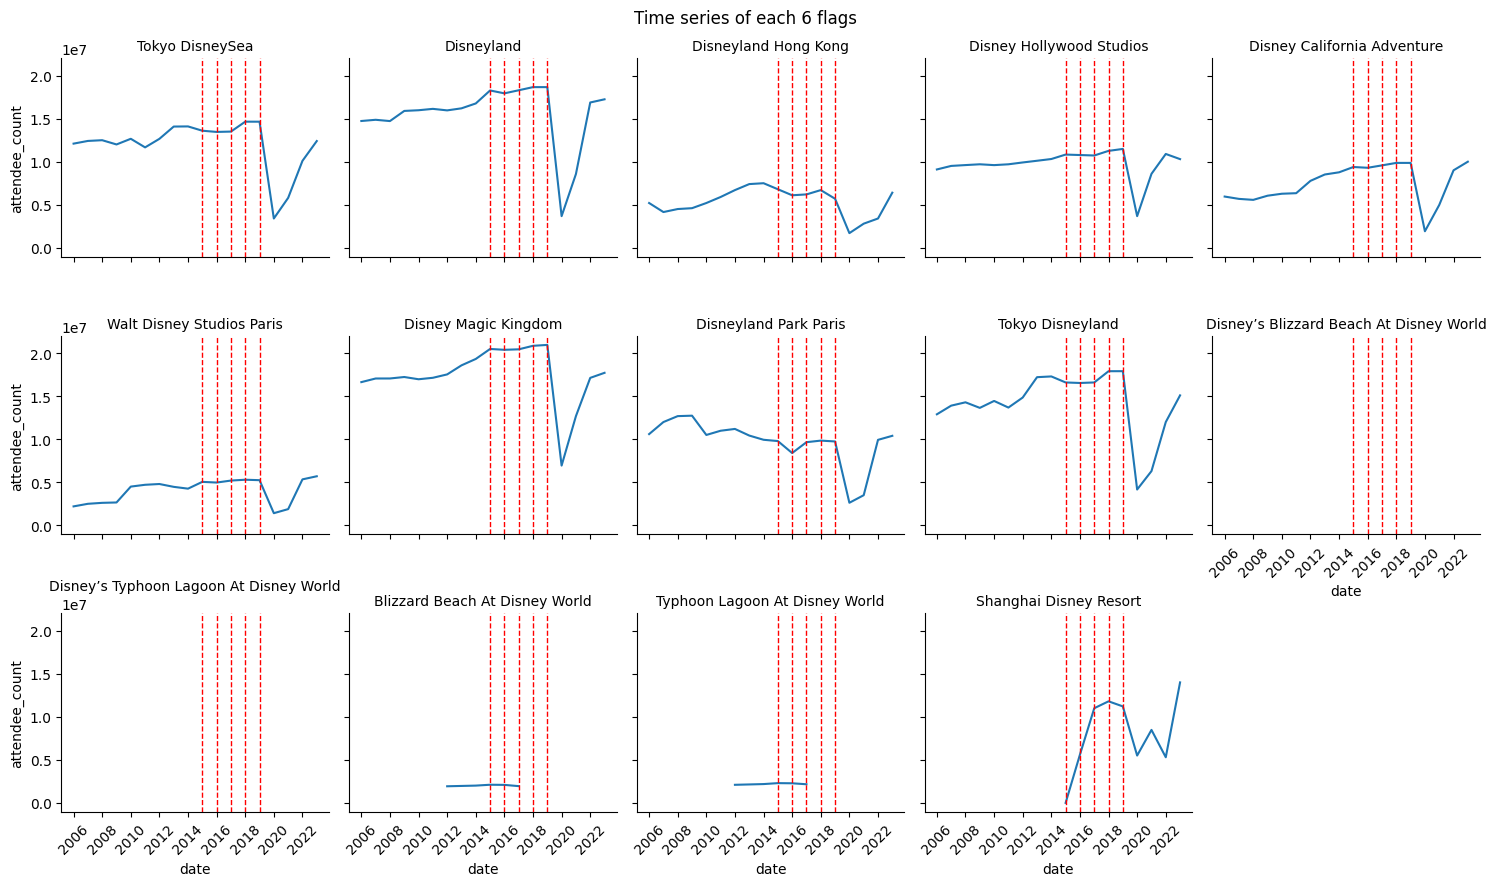

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

total_attendee_data =  pd.read_csv('../data/raw/attendee.csv')
total_attendee_data['date'] = pd.to_datetime(total_attendee_data[['year']].assign(day=1, month=1))

def get_plots(total_attendee_data, park_name, years=[]):
    data = total_attendee_data.loc[total_attendee_data['name'].str.contains(park_name)]
    data = data.sort_values('date')
    
    
    g = sns.FacetGrid(data, col='name', col_wrap = 5)
    g = g.map(plt.plot, 'date', 'attendee_count')
    year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    
    for ax in g.axes.flat:
        plt.sca(ax)
        plt.xticks(rotation = 45)
        for timestamp in year_lst:
            plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    g = g.set_titles('{col_name}')
    g = g.fig.suptitle('Time series of each 6 flags')
    
    plt.tight_layout()
    plt.show()
    # fig, ax = plt.subplots(figsize = (8, 4))
    # ax.plot(data['date'], data['attendee_count'])
    # ax.set_title)
    # ax.set_xticks(rotation=45)
    
    # year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    # for timestamp in year_lst:
    #     plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    

# # disney_paris_data = total_attendee_data.loc[total_attendee_data['name'] == 'Disneyland Park Paris']
# # epcot_data = total_attendee_data.loc[total_attendee_data['name'].str.contains('Epcot')]

# epcot_data = epcot_data.sort_values('date')
# print(epcot_data.shape)

# 2021 - 2023 campaign "The World’s Most Magical Celebration"
# get_plots(total_attendee_data, 'Epcot', list(range(2020,2024)))

# # 2018 campaign "Magic Everywhere"
# get_plots(total_attendee_data, 'Disneyland Park Paris', [2017,2018,2019])

# # 2023 campaign "Ignite the Magic"
# get_plots(total_attendee_data, 'Shanghai Disney Resort', list(range(2021,2024)))

get_plots(total_attendee_data, 'Disney', list(range(2015,2020)))

# fig, ax = plt.subplots(figsize = (13, 13))
# ax.plot(epcot_data['date'], epcot_data['attendee_count'])  